### Computational Machine Learning (COSC2793) : Assignment 1

Aim of this assignment is to predict the life expectancy of a new born based on attributes given related to the region of birth. Follwing packages are required to perform the analysis on data.

In [277]:
# To display output of all the statements and not only last statement
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
import seaborn as sns
import math
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from matplotlib.lines import Line2D      


from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVR

Loading the Training data into DataFrame. Describe() gives basic statistics on our data to understand the shape and distribution of the data.

In [278]:
# Load the Train data
lifeExpectancy = pd.read_csv('train.csv', delimiter=',', index_col = 0)

# Check loaded data
print("================================= Checking the loaded data =================================")
lifeExpectancy.head()
print("================================= Column Names =================================")
lifeExpectancy.columns

# Basic statistical analysis
print("================================= Basic Statistical Analysis =================================")
lifeExpectancy.describe()


================================= Checking the loaded data =================================


,TARGET_LifeExpectancy,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,InfantDeaths,Alcohol,PercentageExpenditure,...,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
ID,,,,,,,,,,,,,,,,,,,,,
1,67.1,146,2017,0,263,262,264,62,0.01,71.279624,...,6,8.16,65.0,0.1,654.37,33736494,17.2,17.3,0.479,3.178050
2,59.8,146,2016,0,271,278,264,64,0.01,73.523582,...,58,8.18,62.0,0.1,686.22,327582,17.5,17.5,0.476,3.162278
3,57.6,146,2015,0,268,246,290,66,0.01,73.219243,...,62,8.13,64.0,0.1,707.55,31731688,17.7,17.7,0.470,3.146427
4,55.5,146,2014,0,272,248,296,69,0.01,78.184215,...,67,8.52,67.0,0.1,750.35,3696958,17.9,18.0,0.463,3.130495
5,57.7,146,2013,0,275,278,272,71,0.01,7.097109,...,68,7.87,68.0,0.1,71.16,2978599,18.2,18.2,0.454,3.082207


================================= Column Names =================================


Index(['TARGET_LifeExpectancy', 'Country', 'Year', 'Status', 'AdultMortality',
       'AdultMortality-Male', 'AdultMortality-Female', 'InfantDeaths',
       'Alcohol', 'PercentageExpenditure', 'Measles', 'BMI', 'UnderFiveDeaths',
       'Polio', 'TotalExpenditure', 'Diphtheria', 'HIV-AIDS', 'GDP',
       'Population', 'Thinness1-19years', 'Thinness5-9years',
       'IncomeCompositionOfResources', 'Schooling'],
      dtype='object')

================================= Basic Statistical Analysis =================================


,TARGET_LifeExpectancy,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,InfantDeaths,Alcohol,PercentageExpenditure,...,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
count,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,...,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2.071000e+03,2071.000000,2071.000000,2071.000000,2071.000000
mean,69.274505,95.360212,2009.518590,0.185418,162.833897,161.908257,163.759536,33.079672,4.696379,764.540216,...,82.727185,5.883858,82.753259,1.632883,7352.742342,1.203741e+07,4.941284,4.977306,0.609551,3.372453
std,9.482281,54.861641,4.614147,0.388730,118.872170,119.442235,118.800292,135.832868,4.205888,2081.880374,...,23.188837,2.554965,23.130969,4.782325,15219.978663,6.391797e+07,4.697830,4.785532,0.216532,0.590832
min,37.300000,0.000000,2002.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.010000,0.000000,...,3.000000,0.370000,2.000000,0.100000,1.880000,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,63.000000,50.000000,2006.000000,0.000000,74.000000,74.000000,74.000000,0.000000,0.615000,5.848550,...,77.000000,4.190000,78.000000,0.100000,413.730000,1.274450e+05,1.600000,1.500000,0.463000,3.065942
50%,71.200000,94.000000,2010.000000,0.000000,144.000000,142.000000,144.000000,3.000000,3.830000,69.020425,...,93.000000,5.640000,93.000000,0.100000,1410.670000,6.522310e+05,3.200000,3.300000,0.655000,3.449638
75%,76.000000,144.000000,2014.000000,0.000000,228.000000,228.000000,230.000000,22.000000,7.840000,430.190047,...,97.000000,7.430000,97.000000,0.800000,5811.295000,5.371104e+06,7.400000,7.400000,0.769500,3.741657
max,92.700000,192.000000,2017.000000,1.000000,699.000000,704.000000,722.000000,1800.000000,17.870000,19479.911610,...,99.000000,17.600000,99.000000,50.600000,133473.470000,1.293859e+09,27.700000,28.600000,0.948000,4.381780


### Data Exploration and Data Engineering

Checking the distubution of the variables.

<Figure size 432x288 with 0 Axes>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f02ada78a58>,
      dtype=object)

<Figure size 432x288 with 0 Axes>

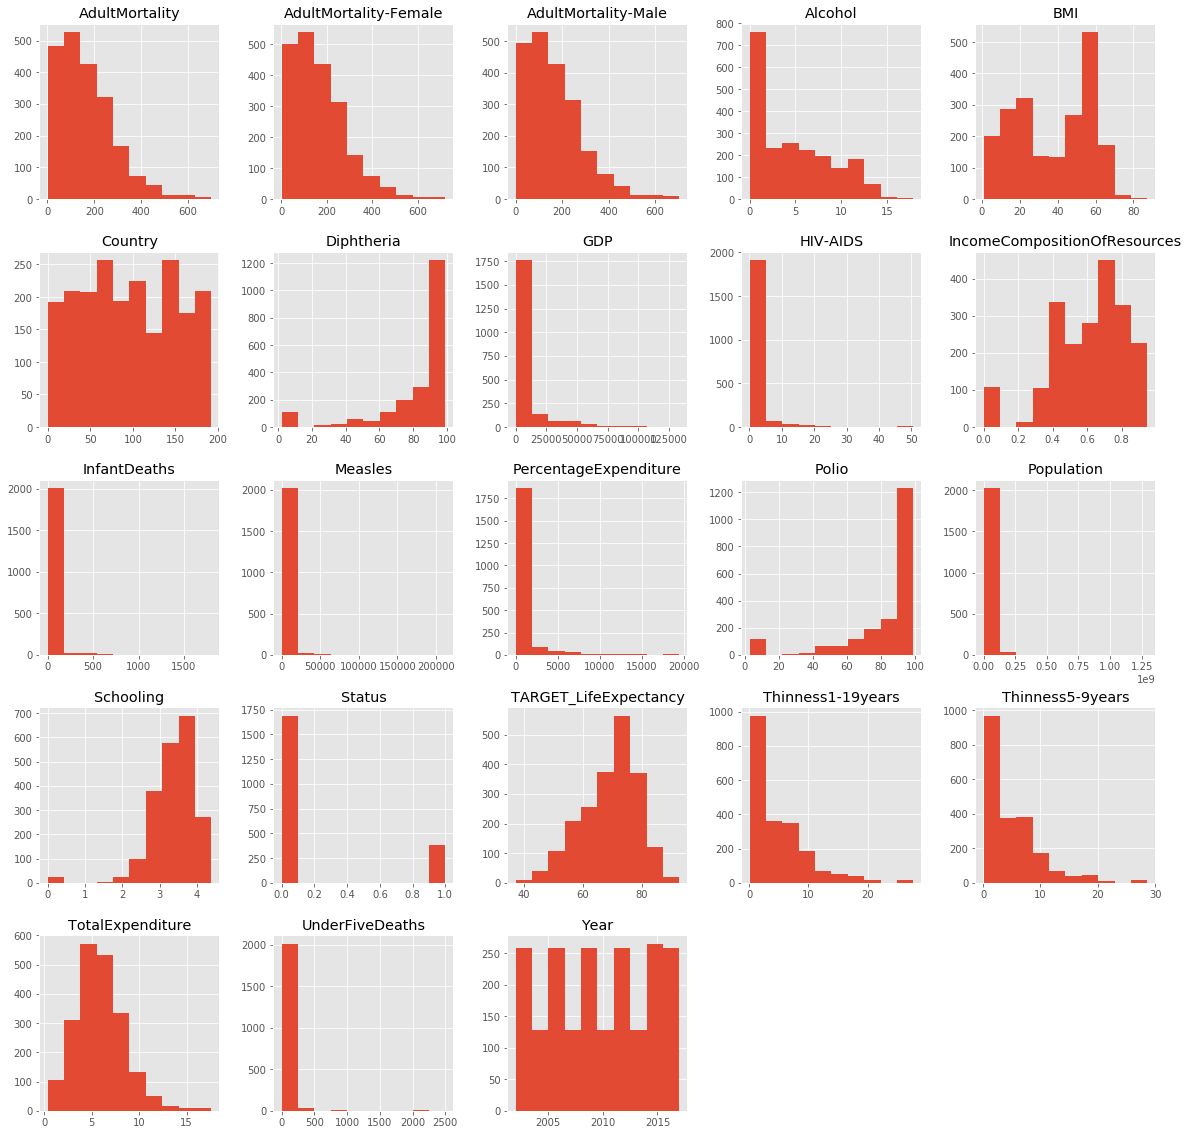

In [279]:
plt.figure()
lifeExpectancy.hist(figsize=(20,20))
plt.show()

Checking correlation among the features

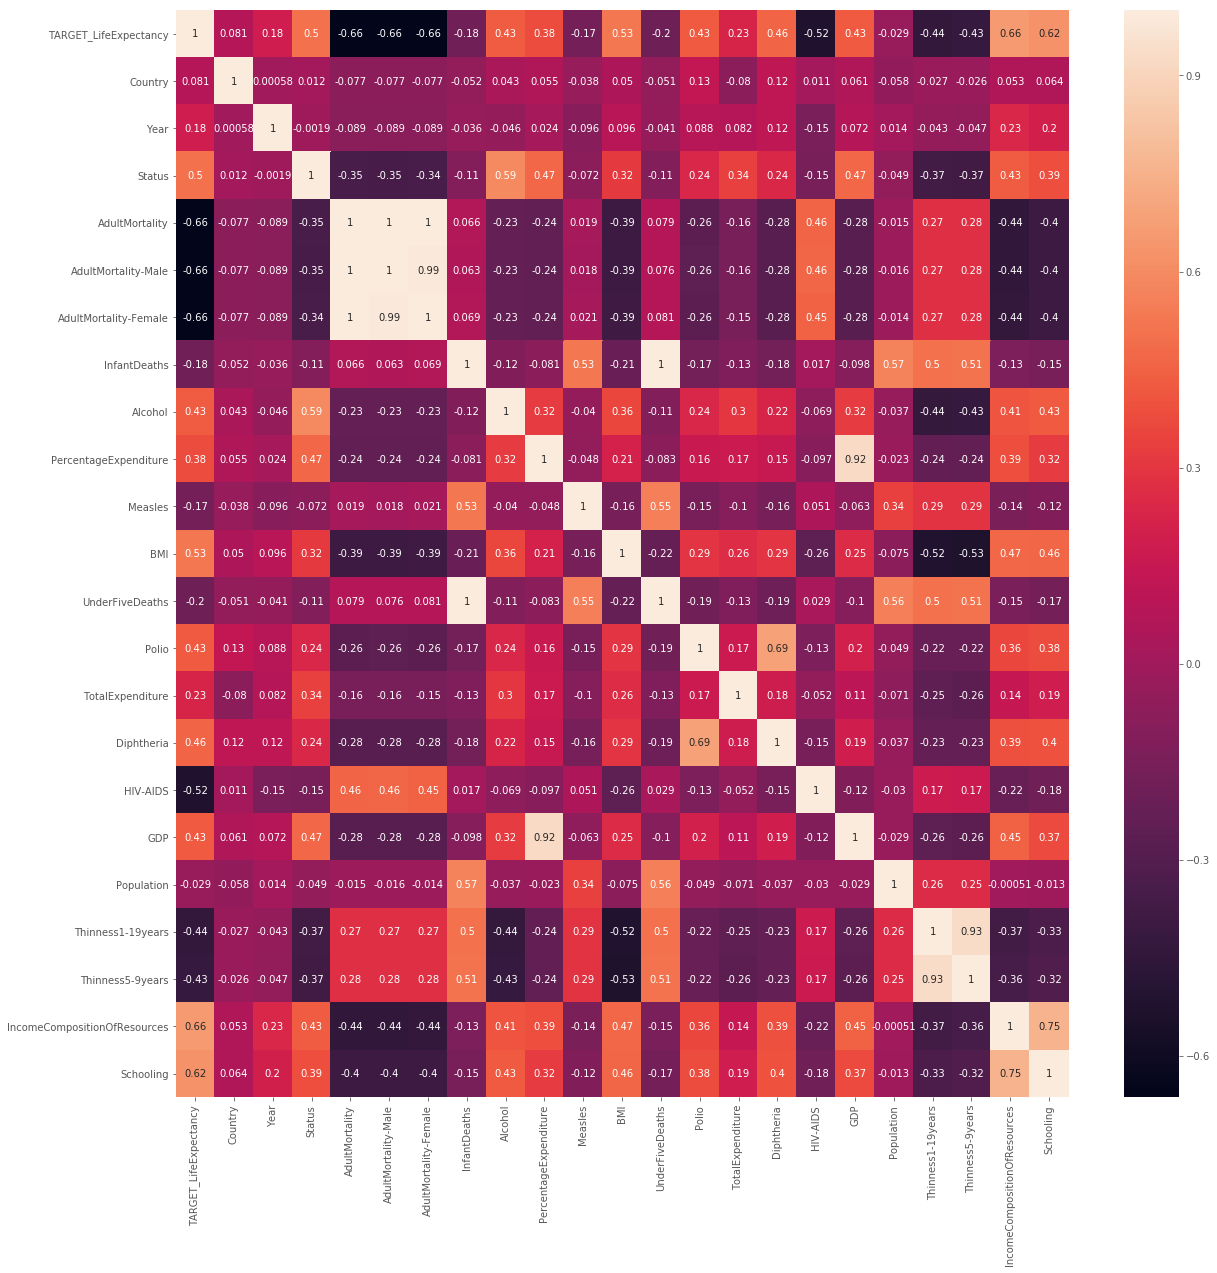

In [280]:
datacorr = lifeExpectancy.corr()
f, a = plt.subplots(figsize=(20,20))
sns.heatmap(datacorr, annot=True)

Splitting the data into features and target variables to perform regression algorithms. Applying MinMax scaling to reduce the effect of large value variables. 

In [281]:
# Spliting the variable into target and feature variable.
features = lifeExpectancy.drop('TARGET_LifeExpectancy', axis = 1)
target = lifeExpectancy[['TARGET_LifeExpectancy']]

# Perform MinMax Sclaing on Feature variables
scaledFeatures = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(features))
print("================================= Feature variables after scaling =================================")
scaledFeatures.head()

================================= Feature variables after scaling =================================


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.760417,1.000000,0.0,0.375358,0.372159,0.363889,0.034444,0.0,0.003659,0.005439,...,0.031250,0.452118,0.649485,0.0,0.004889,0.026074,0.619565,0.603509,0.505274,0.725287
1,0.760417,0.933333,0.0,0.386819,0.394886,0.363889,0.035556,0.0,0.003774,0.002319,...,0.572917,0.453279,0.618557,0.0,0.005127,0.000253,0.630435,0.610526,0.502110,0.721688
2,0.760417,0.866667,0.0,0.382521,0.349432,0.400000,0.036667,0.0,0.003759,0.002027,...,0.614583,0.450377,0.639175,0.0,0.005287,0.024525,0.637681,0.617544,0.495781,0.718070
3,0.760417,0.800000,0.0,0.388252,0.352273,0.408333,0.038333,0.0,0.004014,0.013135,...,0.666667,0.473012,0.670103,0.0,0.005608,0.002857,0.644928,0.628070,0.488397,0.714435
4,0.760417,0.733333,0.0,0.392550,0.394886,0.375000,0.039444,0.0,0.000364,0.014200,...,0.677083,0.435287,0.680412,0.0,0.000519,0.002302,0.655797,0.635088,0.478903,0.703414


Splitting the data into training and testing set. Here data is splitted into 80-20 training 7 testing ratio.

In [282]:
# Splitting the data into testing and training data 
trainX, testX, trainY, testY = train_test_split(scaledFeatures,target, test_size=0.2, random_state=5)

print("================================= Size of Testing and Training data =================================")
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

================================= Size of Testing and Training data =================================
(1656, 22)
(415, 22)
(1656, 1)
(415, 1)


In [283]:
# Function to print model evaluation 
from sklearn.metrics import r2_score
def printEval(predVal, model):
    mse = mean_squared_error(testY, predVal)
    print('Mean squared error: {}'.format(mse))
    rmse = math.sqrt(mse)
    print('RMSE: {}'.format(rmse))
    r2Score = r2_score(testY, predVal)
    print('R2 Score: {}'.format(r2Score))
    
# Function to plot output 
def plotOutput(predVals):
    diff = pd.DataFrame(testY).values - predVals
    sns.regplot(x=predVals.flatten(), y= diff.flatten(), color = "mediumaquamarine")    
    sns.regplot(x=predVals, y=testY['TARGET_LifeExpectancy'], color= "teal")     
    setele = [Line2D([0], [0], color='teal', lw = 5, label='Output vs Prediction'),
                       Line2D([0], [0], color='mediumaquamarine', lw =5 ,label='Residual')]
    plt.legend(handles=setele, loc='right',prop={'size': 12})
    plt.title("Plot of Residual and Predicted vs PolymalRidge - Output  plot")
    plt.show();
    

### Model Imlementation & Evaluation

Now the data is ready to apply the regression models on it. I will apply various model and evaluate those to identify the best performing model. The final model will be used to predict the value of the test data set provided for this assignment.

#### Multiple Linear Regression

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

================================= Model parameters =================================
Intercept:  [54.9247628]
Coefficient:  [[   0.77108915    0.92942447    2.64602008   -4.61644004   -2.02297092
    -6.97274828  180.62244278    3.1762005    -0.47460794    0.45045168
     3.10086054 -189.76729508    2.53187492   -0.73045267    2.45457492
   -25.44459377    6.67952457    0.61329776   -2.47229697   -0.76078658
     5.92121135    9.53106835]]
================================= Evaluation =================================
Mean squared error: 19.542423620251977
RMSE: 4.420681352489905
R2 Score: 0.7476465815147076


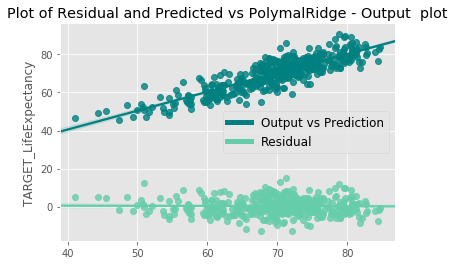

In [284]:
linRegModel = linear_model.LinearRegression()
linRegModel.fit(trainX, trainY)

print("================================= Model parameters =================================")
print("Intercept: ",linRegModel.intercept_)
print("Coefficient: ",linRegModel.coef_)

# Predict value on test set
predmultireg = linRegModel.predict(testX)

print("================================= Evaluation =================================")
printEval(predmultireg, linRegModel)
plotOutput(predmultireg)

#### Poly Nomial Regression

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

================================= Evaluation =================================
Mean squared error: 23.46341775369592
RMSE: 4.843905217249397
R2 Score: 0.6970143624684502


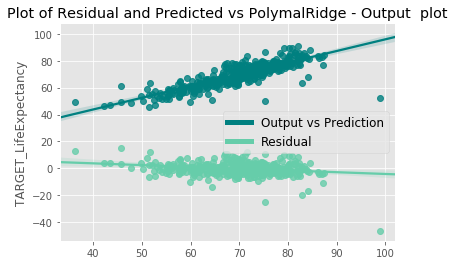

In [285]:
# PolyNomial regression with degree 2 performs better than any other degree
polyNomFeat = PolynomialFeatures(degree=2, include_bias=True)
polyNomTrainX = polyNomFeat.fit_transform(trainX)
polyNomTestX = polyNomFeat.fit_transform(testX)

polyNomLinReg = linear_model.LinearRegression()
polyNomLinReg.fit(polyNomTrainX, trainY)
polyNomPred = polyNomLinReg.predict(polyNomTestX)

print("================================= Evaluation =================================")
printEval(polyNomPred, polyNomLinReg)
plotOutput(polyNomPred)

#### Poly Nomial Ridge Regression

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('model', Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

================================= Evaluation =================================
Mean squared error: 14.65245770298175
RMSE: 3.827852884187394
R2 Score: 0.8107912374426912


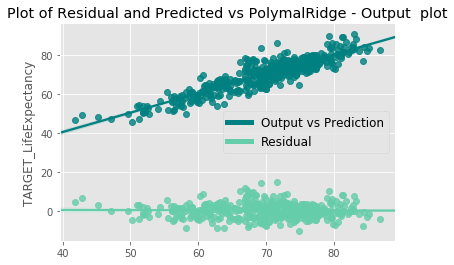

In [286]:
# from sklearn.model_selection import GridSearchCV
steps = [
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=1, fit_intercept=True))
]

polyridge_pipe = Pipeline(steps)

polyridge_pipe.fit(trainX, trainY)
predRidge = polyridge_pipe.predict(testX)

print("================================= Evaluation =================================")
printEval(predRidge, polyridge_pipe)
plotOutput(predRidge)

#### Lasso PolyNomial Regression

In [287]:
lasso_steps = [
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso(alpha=0.01, fit_intercept=True))
]

polylasso_pipe = Pipeline(lasso_steps)
polylasso_pipe.fit(trainX, trainY)

predLasso = polylasso_pipe.predict(testX)

print("================================= Evaluation =================================")
printEval(predLasso, polylasso_pipe)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('model', Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))])

================================= Evaluation =================================
Mean squared error: 16.208349921273314
RMSE: 4.025959503183473
R2 Score: 0.7906998338527266


#### Linear SVR

In [288]:
no_sample, no_feature = 10, 5
rstate = np.random.RandomState(0)
y = rstate.randn(no_sample)
X = rstate.randn(no_sample, no_feature)
clf = SVR(C=1.0, epsilon=0.2, kernel='linear')
clf.fit(trainX, trainY)
SVR(epsilon=0.2)

predSVR = clf.predict(testX)

print("================================= Evaluation =================================")
printEval(predSVR, clf)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

================================= Evaluation =================================
Mean squared error: 20.86159903472459
RMSE: 4.567449948792498
R2 Score: 0.7306119274772764


### Testing

Load the test dataset into a DataFrame. Scale the data to prepare it for predicting the life expectancy.

In [289]:
testData = pd.read_csv('test.csv', delimiter=',')
testData.head()

testFeatures = testData.drop("ID", axis = 1)
print(testFeatures.shape)
# Apply MinMAx scaling
testScaled =  pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(testFeatures))
testScaled.head()

testScaled.shape

,ID,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,InfantDeaths,Alcohol,PercentageExpenditure,...,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
0,1,120,2017,0,335,314,356,66,6.35,0.000000,...,7.0,3.84,64,1.9,4139.29,2785935.0,8.3,8.2,0.531,3.376389
1,2,120,2016,0,348,338,358,67,8.33,23.965612,...,68.0,3.31,64,2.0,536.83,2692466.0,8.5,8.3,0.527,3.376389
2,3,120,2015,0,355,362,348,69,8.10,35.958573,...,67.0,4.26,77,2.3,542.77,2599834.0,8.6,8.5,0.523,3.376389
3,4,120,2014,0,358,348,368,72,8.24,256.122524,...,75.0,3.30,75,2.6,5150.04,259615.0,8.8,8.6,0.508,3.209361
4,5,120,2013,0,361,368,354,75,8.06,239.891392,...,73.0,3.38,71,2.5,4815.02,24218565.0,8.9,8.8,0.495,3.065942


(867, 22)


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.626316,1.000000,0.0,0.462604,0.423181,0.456186,0.134694,0.480667,0.000000,0.000647,...,0.041667,0.254920,0.635417,0.041475,0.041690,0.051449,0.506173,0.426316,0.566702,0.742108
1,0.626316,0.933333,0.0,0.480609,0.455526,0.458763,0.136735,0.630781,0.002042,0.064109,...,0.677083,0.205248,0.635417,0.043779,0.005371,0.049723,0.518519,0.431579,0.562433,0.742108
2,0.626316,0.866667,0.0,0.490305,0.487871,0.445876,0.140816,0.613343,0.003064,0.046705,...,0.666667,0.294283,0.770833,0.050691,0.005430,0.048012,0.524691,0.442105,0.558164,0.742108
3,0.626316,0.800000,0.0,0.494460,0.469003,0.471649,0.146939,0.623958,0.021826,0.024429,...,0.750000,0.204311,0.750000,0.057604,0.051880,0.004792,0.537037,0.447368,0.542156,0.705397
4,0.626316,0.733333,0.0,0.498615,0.495957,0.453608,0.153061,0.610311,0.020443,0.007940,...,0.729167,0.211809,0.708333,0.055300,0.048503,0.447275,0.543210,0.457895,0.528282,0.673874


(867, 22)

In [290]:
# polyTestdata = polyFeat.fit_transform(testData)


predResult = ridge_pipe.predict(testScaled)

finalPrediction = pd.DataFrame({"ID": testData['ID'], "TARGET_LifeExpectancy": predResult.flatten()})
finalPrediction.head()

finalPrediction.to_csv("TestResult.csv", index = False)

,ID,TARGET_LifeExpectancy
0,1,59.007433
1,2,56.373707
2,3,56.161638
3,4,55.912082
4,5,55.608305


In [291]:
finalPrediction.describe()

,ID,TARGET_LifeExpectancy
count,867.000000,867.000000
mean,434.000000,68.259545
std,250.425638,9.364754
min,1.000000,39.219449
25%,217.500000,61.369588
50%,434.000000,71.202699
75%,650.500000,74.833277
max,867.000000,84.416484
